In [ ]:
# The POI of Hong Kong is provided by the Land Department, which is open at https://www.landsd.gov.hk/en/survey-mapping/mapping/other-products/iGeoCom.html 

In [1]:
# Transfer the csv data to shp file
import pandas as pd
import geopandas as gpd

# Read the csv file
df = pd.read_csv("GeoCom4.0_202312.csv")
df.head()

# Transfer the csv file to shp file
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.EASTING, df.NORTHING), crs="EPSG:2326") # The original crs is HK80 (Hong Kong 1980 Grid System), i.e, EPSG:2326.
# Transfer the crs to WGS84
gdf = gdf.to_crs("EPSG:4326")
# Save the shp file
gdf.to_file("GeoCom4.0_202312.shp")

C:\Users\13305\AppData\Local\Temp\ipykernel_15088\1526004958.py:6: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("GeoCom4.0_202312.csv")
C:\Users\13305\AppData\Local\Temp\ipykernel_15088\1526004958.py:14: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("GeoCom4.0_202312.shp")
c:\Users\13305\anaconda3\envs\geoprocessing\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'ENGLISHNAME' to 'ENGLISHNAM'
  ogr_write(
c:\Users\13305\anaconda3\envs\geoprocessing\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'CHINESENAME' to 'CHINESENAM'
  ogr_write(
c:\Users\13305\anaconda3\envs\geoprocessing\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Value 'PLAYGROUND ON G/F., CLASSROOM F, STAFF ROOM & STAFF COMMON ROOM ON 1/F., PORTION OF 1/F.,CLASSROOM C-D & MUSIC/COMPUTER ROOM ON

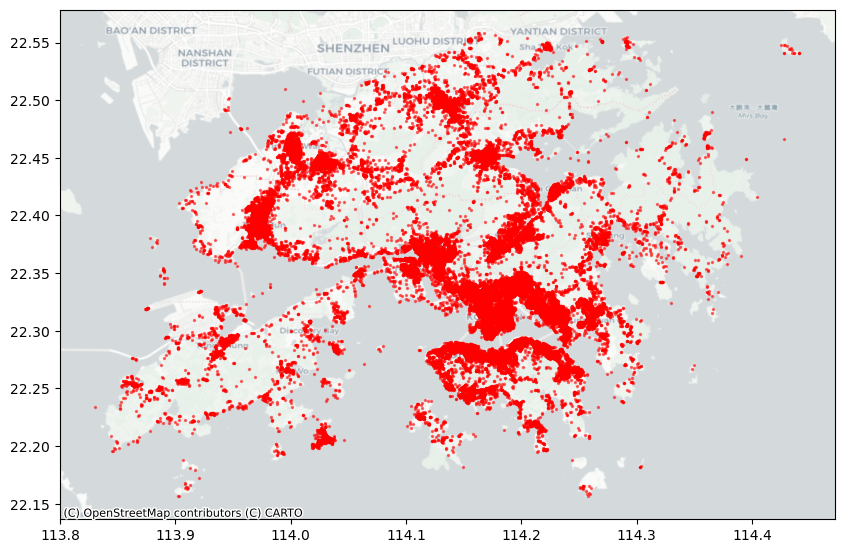

In [7]:
# Plot the shp file
import matplotlib.pyplot as plt
import contextily as ctx

# fig, ax = plt.subplots()
ax = gdf.plot(markersize=2, color='red', alpha=0.5, figsize=(10, 10))
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
plt.show()